# Readme

This notebook contains the exploration process on the 2018 Palu tsunami data. The data provided by xview has additional information about the metadata of each satellite image. Additional information about the image is entered into a file with json format. We will dive into the information provided and explore from the data provided. After running this notebook you will get a csv containing train and test data.

To run this notebook you need kaggle api file to interact with datasets to download the data. Upload your kaggle API file to '/content' directory and you will be ready to run this notebook.

If you've never used the kaggle API, please follow this instruction:
* Log in to [Kaggle](https://www.kaggle.com/). Create a new account if you don't have one.
* Go to your account settings by clicking on the top right.
* Scroll down to the API section.
* Click on 'Create New API Token' button to download the token as a JSON file.
* Upload it to '/content' directory in your colab environment.

# Load Data

## Load Data from Kaggle

In [1]:
!chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'
!kaggle datasets download auliawicaksono/palu-disaster-satellite-images
!ls

Done
 99% 577M/584M [00:07<00:00, 82.1MB/s]
100% 584M/584M [00:07<00:00, 82.3MB/s]
palu-disaster-satellite-images.zip  sample_data


## Extract zip

In [2]:
import os
import zipfile

with zipfile.ZipFile('/content/palu-disaster-satellite-images.zip', 'r') as zip_ref:
    zip_ref.extractall()

## Put together image files and labels

In [3]:
import shutil

if 'full_palu' not in os.listdir('/content'):
  os.mkdir('full_palu')
  os.mkdir('full_palu/images')
  os.mkdir('full_palu/labels')
else:
   shutil.rmtree('/content/full_palu')
   os.mkdir('full_palu')
   os.mkdir('full_palu/images')
   os.mkdir('full_palu/labels')

folder_list = ['hold', 'test', 'train']
subfolder_list = ['/images', '/labels']
img_dest_dir = '/content/full_palu/images'
json_dest_dir = '/content/full_palu/labels' 

for folder in folder_list:
  for files in os.listdir('/content/palu/' + folder +  subfolder_list[0]):
    shutil.copy('/content/palu/' + folder + subfolder_list[0] + '/' + files, img_dest_dir)

for folder in folder_list:
  for files in os.listdir('/content/palu/' + folder +  subfolder_list[1]):
    shutil.copy('/content/palu/' + folder + subfolder_list[1] + '/' + files, json_dest_dir)

os.mkdir('/content/xBD')
shutil.move('/content/full_palu', '/content/xBD')

'/content/xBD/full_palu'

# Data Preparation

## Exploring data

#### Generate image path

In [4]:
import os
import numpy as np

disaster_paths = '/content/xBD/full_palu/images'
image_paths = []
image_paths.extend(disaster_paths + '/' + image for image in os.listdir(disaster_paths))

#### See disaster image example

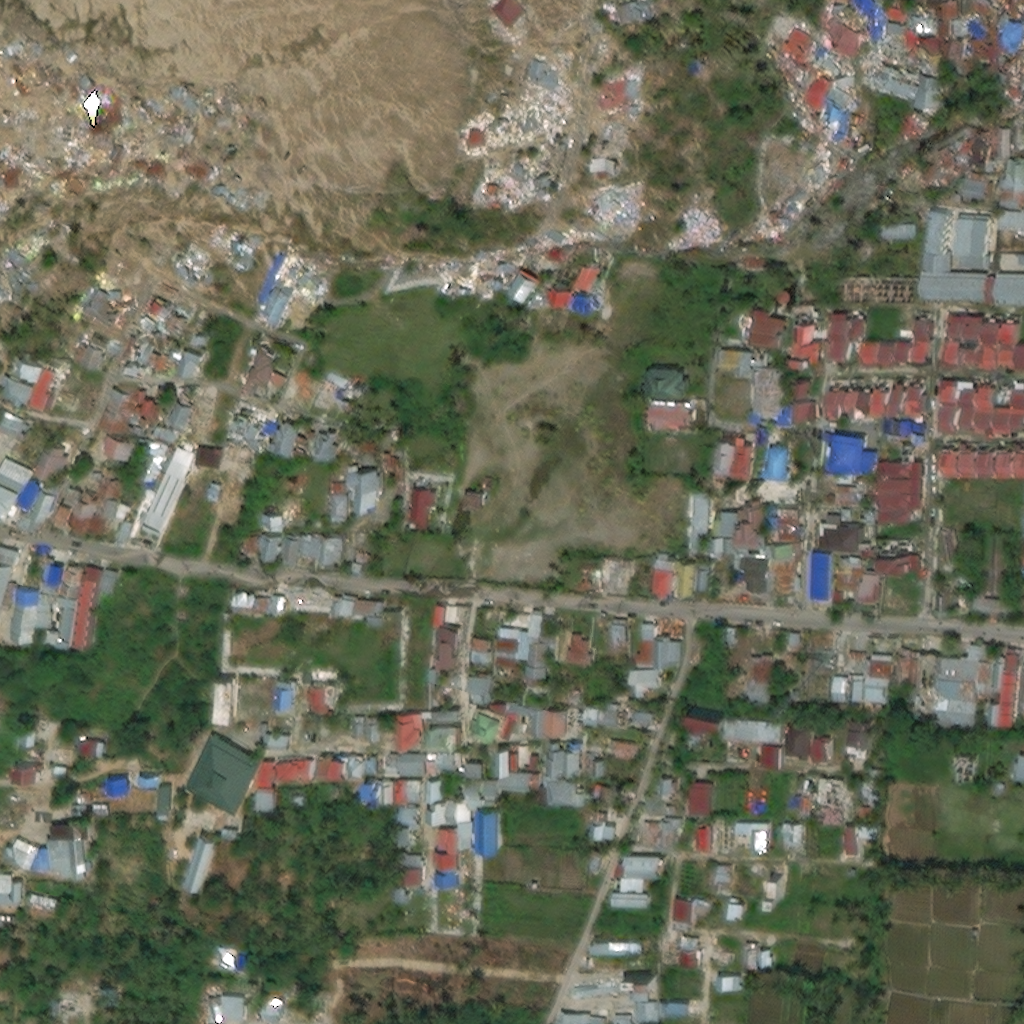

In [5]:
from PIL import Image

img_path = '/content/xBD/full_palu/images/palu-tsunami_00000069_post_disaster.png'
img_obj = Image.open(img_path)
img_obj

Image as array

In [6]:
img_array = np.array(img_obj)
img_array 

array([[[ 83,  82,  60],
        [ 80,  79,  58],
        [ 83,  82,  60],
        ...,
        [124, 104,  87],
        [117,  97,  79],
        [116,  94,  76]],

       [[ 91,  89,  67],
        [ 85,  84,  62],
        [ 78,  77,  57],
        ...,
        [126, 106,  85],
        [119,  99,  78],
        [117,  96,  75]],

       [[101,  97,  74],
        [ 87,  85,  64],
        [ 77,  76,  58],
        ...,
        [116,  99,  78],
        [115,  97,  76],
        [114,  96,  75]],

       ...,

       [[ 90, 101,  72],
        [ 92, 103,  74],
        [ 95, 106,  77],
        ...,
        [ 70,  83,  58],
        [ 81,  93,  65],
        [ 84,  96,  68]],

       [[ 93, 105,  77],
        [ 90, 102,  74],
        [ 94, 106,  77],
        ...,
        [ 74,  85,  61],
        [ 79,  90,  64],
        [ 78,  89,  63]],

       [[ 91, 104,  76],
        [ 91, 103,  75],
        [ 94, 106,  78],
        ...,
        [ 78,  88,  63],
        [ 78,  87,  63],
        [ 77,  86,  61]]

In [7]:
img_array.shape

(1024, 1024, 3)

### Get the label for the image

In [8]:
import json

label_path = img_path.replace('/images', '/labels').replace('.png', '.json')
label_data = json.load(open(label_path))

#### Inspect the metadata

In [9]:
label_data.keys()

dict_keys(['features', 'metadata'])

In [10]:
label_data['metadata']

{'capture_date': '2018-10-01T02:26:02.000Z',
 'catalog_id': '10300100841CB500',
 'disaster': 'palu-tsunami',
 'disaster_type': 'tsunami',
 'gsd': 2.8247435,
 'height': 1024,
 'id': 'MjU3ODMyNA.wf9Yl7HrgKG8iOGaap809QMmcug',
 'img_name': 'palu-tsunami_00000069_post_disaster.png',
 'off_nadir_angle': 36.436947,
 'original_height': 1024,
 'original_width': 1024,
 'pan_resolution': 0.7035197,
 'provider_asset_type': 'WORLDVIEW02',
 'sensor': 'WORLDVIEW02',
 'sun_azimuth': 96.50162,
 'sun_elevation': 68.848434,
 'target_azimuth': 221.88036,
 'width': 1024}

#### Inspect the features

In [11]:
label_data['features'].keys()

dict_keys(['lng_lat', 'xy'])

In [12]:
label_data['features']['lng_lat']

[{'properties': {'feature_type': 'building',
   'subtype': 'destroyed',
   'uid': '52cb81e2-1de8-4649-b5b7-50435e66fe8b'},
  'wkt': 'POLYGON ((119.8408369378314 -0.9065413102557662, 119.8408281326045 -0.9065676740387802, 119.8408392008809 -0.906585484374384, 119.8408396170059 -0.9066129318668118, 119.8406860080401 -0.9066130532713671, 119.8406859479575 -0.9065362106066043, 119.8408384838988 -0.9065360900603522, 119.8408369378314 -0.9065413102557662))'},
 {'properties': {'feature_type': 'building',
   'subtype': 'destroyed',
   'uid': '02aa1642-350d-4b5c-a62e-eddbd0168ddd'},
  'wkt': 'POLYGON ((119.8408435244092 -0.9065360860768183, 119.8409647871037 -0.9065359902403404, 119.8409646174683 -0.9066146259473171, 119.8408500622549 -0.9066159163982045, 119.8408334580799 -0.9065616743942074, 119.8408435244092 -0.9065360860768183))'},
 {'properties': {'feature_type': 'building',
   'subtype': 'destroyed',
   'uid': '145a49ee-9548-4275-b90d-15714529136d'},
  'wkt': 'POLYGON ((119.8408169157609 

In [13]:
type(label_data['features']['lng_lat'])

list

In [14]:
label_data['features']['xy'][0]

{'properties': {'feature_type': 'building',
  'subtype': 'destroyed',
  'uid': '52cb81e2-1de8-4649-b5b7-50435e66fe8b'},
 'wkt': 'POLYGON ((35.07176635278306 1.159070214912839, 33.09870641669615 7.012599055711963, 35.56998249524366 10.96999990164149, 35.65822362465875 17.06582594373226, 1.317969953081912 17.06582591756646, 1.317936528374246 -1.233530600019916e-07, 35.41830950893451 -9.718725939550856e-08, 35.07176635278306 1.159070214912839))'}

In [15]:
type(label_data['features']['xy'])

list

##### Inspect the properties in each building post disaaster

In [16]:
label_data['features']['xy'][50]['properties']

{'feature_type': 'building',
 'subtype': 'destroyed',
 'uid': '568ad541-55c1-45f9-a874-1f5e4e764e59'}

##### Inspect the properties in each building pre disaaster

In [17]:
img_path = '/content/xBD/full_palu/images/palu-tsunami_00000069_pre_disaster.png'
img_obj = Image.open(img_path)
img_array = np.array(img_obj)
label_path = img_path.replace('/images', '/labels').replace('.png', '.json')
label_data = json.load(open(label_path))

# see 10 example
for x in range(10):
  print(label_data['features']['xy'][x]['properties'])

{'feature_type': 'building', 'uid': '52cb81e2-1de8-4649-b5b7-50435e66fe8b'}
{'feature_type': 'building', 'uid': '02aa1642-350d-4b5c-a62e-eddbd0168ddd'}
{'feature_type': 'building', 'uid': '145a49ee-9548-4275-b90d-15714529136d'}
{'feature_type': 'building', 'uid': 'a370ec64-b3df-4ece-997c-4ba3dc3049e7'}
{'feature_type': 'building', 'uid': '43b81bb7-9ae0-4c24-9ed2-c18023a0a9d0'}
{'feature_type': 'building', 'uid': 'ce6458f5-cc75-4608-a1a5-9a7721c01fbd'}
{'feature_type': 'building', 'uid': 'fd74f609-a59f-494d-89b5-6d038111df8d'}
{'feature_type': 'building', 'uid': 'c8fdad42-2def-40c4-909e-40669d47a87b'}
{'feature_type': 'building', 'uid': '6364208e-7623-4d25-879d-9a621631f402'}
{'feature_type': 'building', 'uid': '138fcf4b-1834-4746-a4dd-3e7249433047'}


We can see that pre-disaster labels doesn't have subtype damage properties

### Polygons

#### Extract polygon geometry

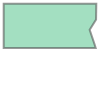

In [18]:
import shapely
import shapely.wkt
#from shapely.geometry import Polygon

polygon_geom = shapely.wkt.loads(label_data['features']['xy'][0]['wkt'])
polygon_geom

In [19]:
polygon_pts = np.array(list(polygon_geom.exterior.coords))
polygon_pts

array([[35.07178386,  1.15907031],
       [33.09872392,  7.01259915],
       [35.57      , 10.97      ],
       [35.65824113, 17.06582604],
       [ 0.        , 17.06582604],
       [ 0.        ,  0.        ],
       [35.41832701,  0.        ],
       [35.07178386,  1.15907031]])

#### Plot polygon on the image

##### View the original image

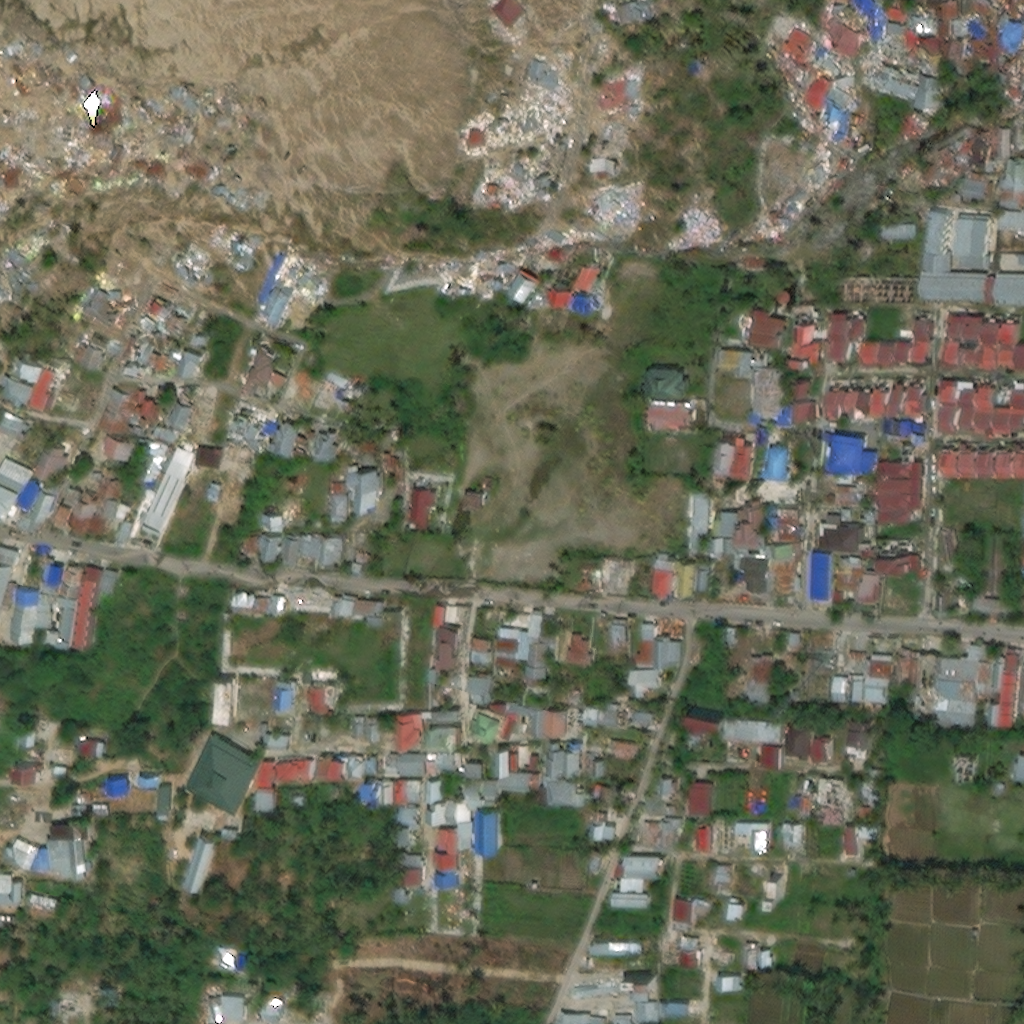

In [20]:
Image.open('/content/xBD/full_palu/images/palu-tsunami_00000069_post_disaster.png')

#### Annotated Map

In [21]:
img_path = '/content/xBD/full_palu/images/palu-tsunami_00000069_post_disaster.png'
img_obj = Image.open(img_path)
img_array = np.array(img_obj)
label_path = img_path.replace('/images', '/labels').replace('.png', '.json')
label_data = json.load(open(label_path))

coords = label_data['features']['xy'] ; len(coords)

479

##### Create lists of tuple containing damage type and wtk polygons

In [22]:
wkt_polygons = []

for coord in coords:
  damage = coord['properties']['subtype']
  wkt_polygons.append((damage, coord['wkt']))
wkt_polygons[0]

('destroyed',
 'POLYGON ((35.07176635278306 1.159070214912839, 33.09870641669615 7.012599055711963, 35.56998249524366 10.96999990164149, 35.65822362465875 17.06582594373226, 1.317969953081912 17.06582591756646, 1.317936528374246 -1.233530600019916e-07, 35.41830950893451 -9.718725939550856e-08, 35.07176635278306 1.159070214912839))')

##### Loads example polygon

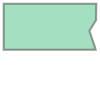

In [23]:
from shapely import wkt
wkt.loads(wkt_polygons[0][1])

##### Create lists of tuples containing damage type and shapely geometry polygon object

In [24]:
polygons = []

for damage, swkt in wkt_polygons:
  polygons.append((damage, wkt.loads(swkt)))
polygons[0]

('destroyed', <shapely.geometry.polygon.Polygon at 0x7ff49c953dd0>)

##### Inspect polygon 

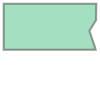

In [25]:
polygons[0][1]

In [26]:
polygons[0][1].exterior.coords.xy

(array('d', [35.07176635278306, 33.09870641669615, 35.56998249524366, 35.65822362465875, 1.317969953081912, 1.317936528374246, 35.41830950893451, 35.07176635278306]),
 array('d', [1.159070214912839, 7.012599055711963, 10.96999990164149, 17.06582594373226, 17.06582591756646, -1.233530600019916e-07, -9.718725939550856e-08, 1.159070214912839]))

##### Plot annotated map

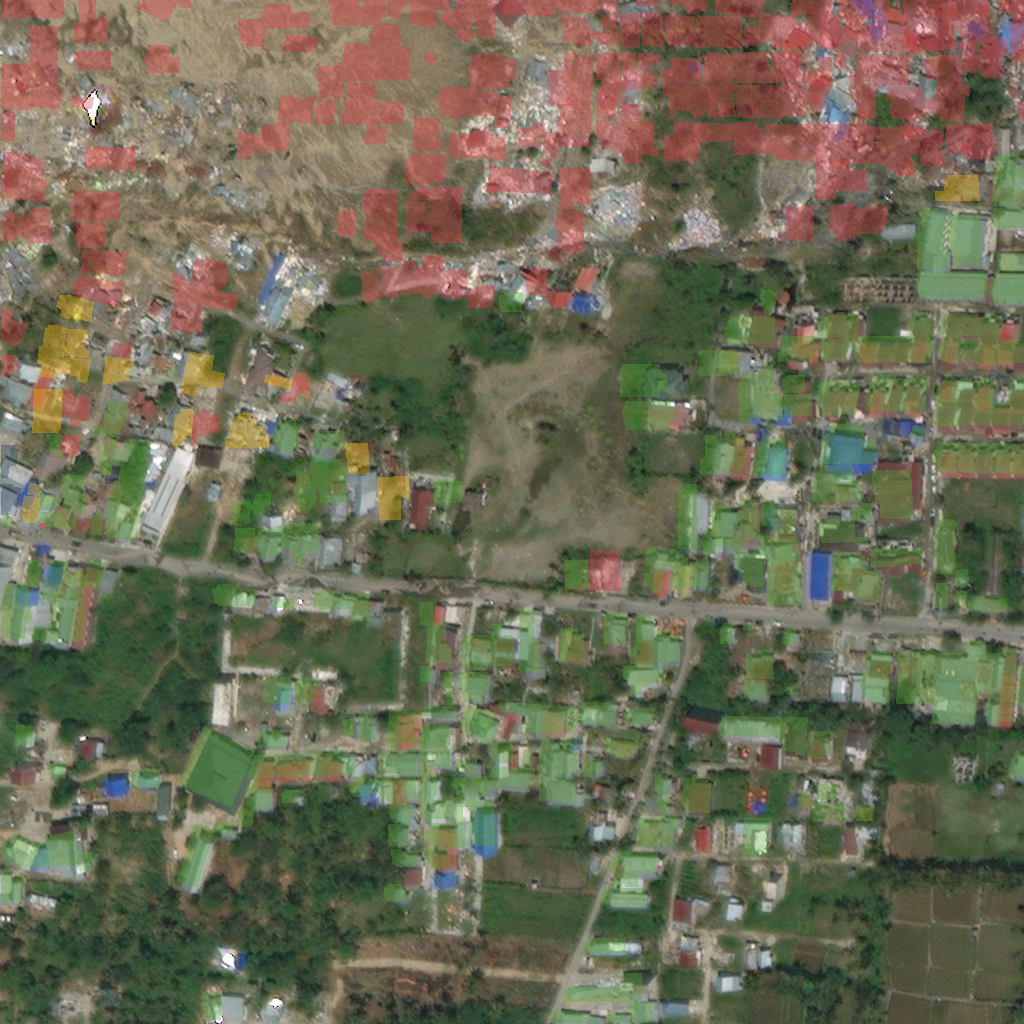

In [27]:
colors = {
    "no-damage": (85, 166, 48, 90),
    "minor-damage": (2, 62, 138, 90),
    "major-damage": (255, 186, 8, 90),
    "destroyed": (230, 57, 70, 90),
    "un-classified": (29, 53, 87, 90)
}

color = {
    "no-damage": 'green',
    "minor-damage": 'blue',
    "major-damage": 'yellow',
    "destroyed": 'red',
    "un-classified": 'black'
}

json_path = '/content/xBD/full_palu/labels/palu-tsunami_00000069_post_disaster.json'
png_path = '/content/xBD/full_palu/images/palu-tsunami_00000069_post_disaster.png'

with open(json_path) as json_file:
  image_json = json.load(json_file)

coords = image_json['features']['xy']
wkt_polygons = [(coord['properties']['subtype'], coord['wkt']) for coord in coords]
polygons = [(damage, wkt.loads(swkt)) for damage, swkt in wkt_polygons]

from PIL import ImageDraw

image = Image.open(png_path)
draw = ImageDraw.Draw(image, 'RGBA')

for damage, polygon in polygons:
    x,y = polygon.exterior.coords.xy
    draw.polygon(list(zip(x,y)), colors[damage])

image

# Split the data

## Create damage intensity dictionary
Create unordered collection of data values that are used to store damage intensity data

In [28]:
from collections import defaultdict

damage_intensity_encoding = defaultdict(lambda:0)
damage_intensity_encoding['no-damage'] = 0
damage_intensity_encoding['minor-damage'] = 1
damage_intensity_encoding['major-damage'] = 2
damage_intensity_encoding['destroyed'] = 3
damage_intensity_encoding

defaultdict(<function __main__.<lambda>>,
            {'destroyed': 3,
             'major-damage': 2,
             'minor-damage': 1,
             'no-damage': 0})

### Create a list of all damaged type encoded

In [29]:
img_path = '/content/xBD/full_palu/images/palu-tsunami_00000069_post_disaster.png'
img_obj = Image.open(img_path)
img_array = np.array(img_obj)
label_path = img_path.replace('/images', '/labels').replace('.png', '.json')
label_data = json.load(open(label_path))

y_data = []

# Iterate over the subtype
for feat in label_data['features']['xy']:
  # Post-disaster image will have a damage type,
  # but pre-disaster image demage is have no-damage.
  try:
    damage_type = feat['properties']['subtype']
  except:
    datame_type = 'no-damage'
  y_data.append(damage_intensity_encoding[damage_type])

Create polygon in the main image. This step we take from https://github.com/segashin/xView2Challenge/blob/master/model/process_data.py 

In [30]:
img_path = '/content/xBD/full_palu/images/palu-tsunami_00000000_post_disaster.png'
img_obj = Image.open(img_path)
img_array = np.array(img_obj)

In [31]:
height, width, color = img_array.shape

xcoords = polygon_pts[:, 0]
ycoords = polygon_pts[:, 1]

xmin = np.min(xcoords)
xmax = np.max(xcoords)
ymin = np.min(ycoords)
ymax = np.max(ycoords)

xmin = max(int(xmin - xmax - xmin), 0)
xmax = min(int(xmax + xmax - xmin), width)
ymin = max(int(ymin - ymax - ymin), 0)
ymax = min(int(ymax + ymax - ymin), height)

poly_img = img_array[ymin:ymax, xmin:xmax, :]

In [32]:
import cv2
cv2.imwrite('/content/test_img.png', poly_img)

True

Loop for all features in all images and create list of uuid png

In [33]:
from tqdm import tqdm

disaster_paths = '/content/xBD/full_palu/images'
image_paths = []
image_paths.extend(disaster_paths + '/' + image for image in os.listdir(disaster_paths))

x_data = []
y_data = []

processed_img_path = '/content/xBD/full_palu/processed_img'

if 'processed_img' not in os.listdir('/content/xBD/full_palu'):
  os.mkdir(processed_img_path)
else:
   shutil.rmtree(processed_img_path)
   os.mkdir(processed_img_path)

for img_path in tqdm(image_paths):

    img_obj = Image.open(img_path)
    img_array = np.array(img_obj)
    height, width, color = img_array.shape

    label_path = img_path.replace('images', 'labels').replace('png', 'json')
    label_file = open(label_path)
    label_data = json.load(label_file)

    for feat in label_data['features']['xy']:
        try:
            damage_type = feat['properties']['subtype']
        except: 
            damage_type = 'no-damage'
            continue
        y_data.append(damage_intensity_encoding[damage_type])

        polygon_geom = shapely.wkt.loads(feat['wkt'])
        polygon_pts = np.array(list(polygon_geom.exterior.coords))

        xcoords = polygon_pts[:, 0]
        ycoords = polygon_pts[:, 1]

        xmin = np.min(xcoords)
        xmax = np.max(xcoords)
        ymin = np.min(ycoords)
        ymax = np.max(ycoords)

        xdiff = xmax - xmin
        ydiff = ymax - ymin

        xmin = max(int(xmin - (xdiff * 0.75)), 0)
        xmax = min(int(xmax + (xdiff * 0.75)), width)
        ymin = max(int(ymin - (ydiff * 0.75)), 0)
        ymax = min(int(ymax + (ydiff * 0.75)), height)

        poly_img = img_array[ymin:ymax, xmin:xmax, :]
        
        poly_uuid = feat['properties']['uid'] + '.png'
        cv2.imwrite(processed_img_path + "/" + poly_uuid, poly_img)
        x_data.append(poly_uuid)

100%|██████████| 392/392 [00:47<00:00,  8.24it/s]


In [34]:
len(os.listdir('/content/xBD/full_palu/processed_img'))

55789

Split the data

In [35]:
RANDOM_STATE = 123
BATCH_SIZE = 64

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = RANDOM_STATE)

In [37]:
import pandas as pd

df_train = pd.DataFrame({'uuid':x_train, 'labels':y_train})
df_test = pd.DataFrame({'uuid':x_test, 'labels':y_test})
print(df_train.shape, df_test.shape)

(39052, 2) (16737, 2)


Split the data

test_path = '/content/xBD/full_palu/processed_img/test'
train_path = '/content/xBD/full_palu/processed_img/train'

if 'test' and 'train' not in os.listdir('/content/xBD/full_palu/processed_img'):
  os.mkdir(test_path)
  os.mkdir(train_path)
else:
  shutil.rmtree(train_path)
  shutil.rmtree(test_path)
  os.mkdir(test_path)
  os.mkdir(train_path)

for png in df_train['uuid']:
  shutil.move('/content/xBD/full_palu/processed_img/' + png, train_path)

for png in df_test['uuid']:
  shutil.move('/content/xBD/full_palu/processed_img/' + png, test_path)

In [38]:
df_train.head()

uuid  labels
0  61acad45-69dc-448d-b6bc-9bb4fa5edf56.png       0
1  3f6a9323-c010-409b-a608-2f7eb8e64b38.png       3
2  708688f6-c824-4ea9-a64f-16164a08a90d.png       2
3  f8025a91-a617-4b62-8466-234779633af8.png       0
4  f5f7e522-3cef-4751-94dd-418120bdd288.png       0

In [39]:
df_test.head()

uuid  labels
0  82448f2a-e7f7-4ff6-96cf-a2ae9dcc659f.png       0
1  013192dd-faa0-425f-9a8a-45b428ac5cb8.png       0
2  11036183-744d-446e-a778-61cdb4339f52.png       0
3  d6e2f88c-03f5-4f4d-ba2a-b3c3e16b02d7.png       0
4  22f9d65e-5455-423a-849a-f2da94979115.png       0

In [40]:
df_train['labels'].value_counts()

0    33193
3     5039
2      819
1        1
Name: labels, dtype: int64

In [41]:
df_test['labels'].value_counts()

0    14214
3     2164
2      359
Name: labels, dtype: int64

## Undersampling

We could see that the number of buildings that has no damage and the number of destroyed buildings are imbalance. We will reduce the classification target from 4 classes to binary classification. We apply undersampling technique to change the composition of the dataset.

In [42]:
df_full = pd.DataFrame({'uuid':x_data, 'labels':y_data})
df_full['labels'].value_counts()

0    47407
3     7203
2     1178
1        1
Name: labels, dtype: int64

In [43]:
df_full['labels'].replace({2: 1}, inplace=True)
df_full['labels'].replace({3: 1}, inplace=True)
df_full['labels'].value_counts()

0    47407
1     8382
Name: labels, dtype: int64

In [44]:
classes_zero = df_full[df_full['labels'] == 0]
classes_one = df_full[df_full['labels'] == 1]

print(f'Class 0: {len(classes_zero)}')
print(f'Class 1: {len(classes_one)}')

classes_zero = classes_zero.sample(len(classes_one))

print(f'Class 0: {len(classes_zero)}')
print(f'Class 1: {len(classes_one)}')

Class 0: 47407
Class 1: 8382
Class 0: 8382
Class 1: 8382


In [45]:
df_full = pd.concat([classes_one, classes_zero])
df_full.sample(frac=1).reset_index(drop=True)

uuid  labels
0      37236532-a6c5-45b8-973a-2fa760292b19.png       1
1      5648483b-4a3b-4144-8f61-eed95ec22090.png       0
2      00ce55fb-0949-4f7a-9d37-4d8f6eadb713.png       1
3      0df1238a-9760-4bbe-99b7-61ccbf746d03.png       1
4      c697dfa9-2069-482c-9c1a-9f71492e5f8d.png       0
...                                         ...     ...
16759  19e14efe-bd07-4776-a805-cfd019069355.png       1
16760  6db6264d-2fb1-49bd-9604-b223c19681ce.png       1
16761  db46f36b-4c1e-41c0-b56f-9f5487c9c300.png       1
16762  02b35593-5493-42a2-931a-8728b5282054.png       1
16763  9bd1a2f2-ceab-43f4-9a57-d484e034495c.png       0

[16764 rows x 2 columns]

In [46]:
x_data = df_full['uuid'].tolist()
y_data = df_full['labels'].tolist()

random_state = 123

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = random_state)

df_train = pd.DataFrame({'uuid':x_train, 'labels':y_train})
df_test = pd.DataFrame({'uuid':x_test, 'labels':y_test})

In [47]:
test_path = '/content/xBD/full_palu/processed_img/test'
train_path = '/content/xBD/full_palu/processed_img/train'

if 'test' and 'train' not in os.listdir('/content/xBD/full_palu/processed_img'):
  os.mkdir(test_path)
  os.mkdir(train_path)
else:
  shutil.rmtree(train_path)
  shutil.rmtree(test_path)
  os.mkdir(test_path)
  os.mkdir(train_path)

for png in df_train['uuid']:
  shutil.move('/content/xBD/full_palu/processed_img/' + png, train_path)

for png in df_test['uuid']:
  shutil.move('/content/xBD/full_palu/processed_img/' + png, test_path)

In [50]:
df_test['labels'].value_counts()

1    1703
0    1650
Name: labels, dtype: int64

In [51]:
df_train['labels'].value_counts()

0    6732
1    6679
Name: labels, dtype: int64

In [48]:
df_train.to_csv('/content/xBD/train.csv')
df_test.to_csv('/content/xBD/test.csv')

In [49]:
from google.colab import files

files.download('/content/xBD/test.csv')
files.download('/content/xBD/train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>